In [1]:
import pickle, os

def merge_pickles(folder, encode_target="query"):
    all_descriptions = {}
    pkl_files = [x for x in os.listdir(folder) if x.startswith(encode_target) and x.endswith(".pkl")]
    for f in pkl_files:
        all_descriptions.update(pickle.load(open(os.path.join(folder, f), "rb")))
    pickle.dump(all_descriptions, open(os.path.join(folder, f"{encode_target}.pkl"), "wb"))

In [2]:
merge_pickles("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/video_caption_300k-t2v", encode_target='target')

In [4]:
import pickle
a = pickle.load(open("descriptions/colpali_train_set/cot/query.pkl", "rb"))

In [5]:
len(a)

117594

In [4]:
import pickle
from matplotlib import pyplot as plt
def get_min_max_len(file):
    data = pickle.load(open(file, "rb"))
    lengths = [len(v.split()) for v in data.values()]
    plt.hist(lengths, bins=50)
    plt.show()
    return min(lengths), max(lengths), sum(lengths)/len(lengths)

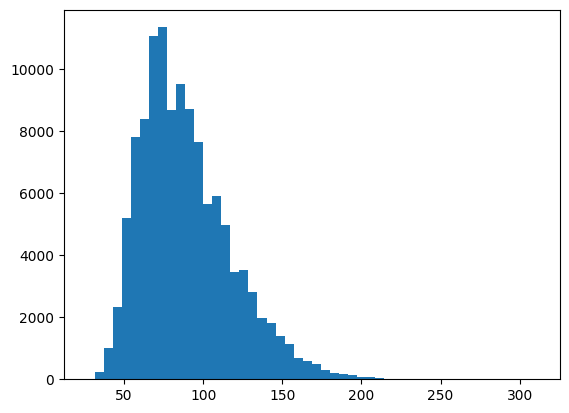

(26, 311, 89.28522713743898)

In [5]:
get_min_max_len("descriptions/colpali_train_set/cot/query.pkl")

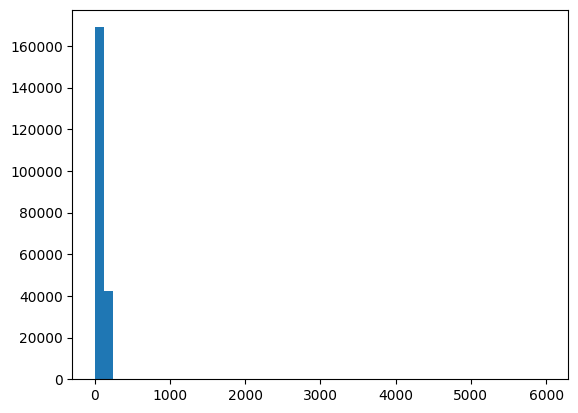

(2, 5998, 95.52046637262588)

In [6]:
get_min_max_len('descriptions/video_qa_240k/cot/query.pkl')

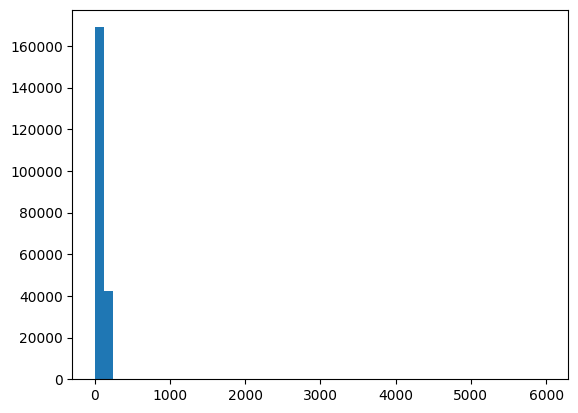

SyntaxError: 'return' outside function (1768609335.py, line 5)

In [ ]:
data = pickle.load(open("descriptions/video_qa_240k/cot/query.pkl", "rb"))
lengths = [len(v.split()) for v in data.values()]
plt.hist(lengths, bins=50)
plt.show()

In [13]:
len([l for l in lengths if l>1000])

16

In [16]:
for k,v in data.items():
    if len(v.split()) > 300:
        print(k, v)
        break

('v_rs7er4e67ec-Scene-001_2',) <think>The video shows a sequence of images with a black background. The first image features a silver shield with a blue glow around it and the words 'FIVE SEMIFINALS' and 'ONE FINAL DANCE' in white text. The second image displays a soccer player in a blue jersey with the number 9 on it, holding a trophy. The third image shows a soccer player in a blue jersey with his arms raised. The fourth image depicts a soccer player in a blue jersey with his arms raised. The fifth image shows a soccer player in a blue jersey with his arms raised. The sixth image features a soccer player in a blue jersey with his arms raised. The seventh image shows a soccer player in a blue jersey with his arms raised. The eighth image depicts a soccer player in a blue jersey with his arms raised. The ninth image features a soccer player in a blue jersey with his arms raised. The tenth image shows a soccer player in a blue jersey with his arms raised. The eleventh image depicts a so

In [18]:
import pickle

next(iter(pickle.load(open("/home/xuanmingcui/projects/VLM2Vec/runs/full/qwen2_2b_full_chat_sftonly_qry_tgt_lr2e-4_lora16_8x8_464928/generation/GQA/cot/query.pkl", "rb")).items()))

(('<|image_1|>\nRepresent the given image with the following question: Are any women visible?\n',
  'GQA/image_2367210.jpg'),
 '<think>The image shows a woman holding a colorful umbrella and walking down a street, but there are no other women visible in the frame.</think> Answer: Yes')

In [6]:
def key_to_tuple(file_path):
    orig = pickle.load(open(file_path, "rb"))
    new_dict = {}
    for k, v in orig.items():
        if isinstance(k, str) or isinstance(k, int):
            new_dict[(k, )] = v
        else:
            new_dict[k] = v
    pickle.dump(new_dict, open(file_path, "wb"))

In [7]:
key_to_tuple("descriptions/video_qa_240k/query.pkl")

In [39]:
key_to_tuple("descriptions/VisRag-Indomain-data/target.pkl")

In [14]:
import json

with open("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/video_rewrites_300k.jsonl", 'r') as f:
    data = []
    for line in f.readlines():
        item = json.loads(line)
        data.append(item)

In [6]:
import json
with open("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/colpali_train_set/colpali_train_set/train/description_all.jsonl", 'r') as f:
    copali = []
    for line in f.readlines():
        item = json.loads(line)
        copali.append(item)

In [7]:
len(copali)

117594

In [4]:
copali_dict = {}
for item in copali:
    copali_dict[(item["order_id"],)] = item['rewrite']

In [21]:
import pickle
g = pickle.load(open("descriptions/video_qa_240k/cot/query.pkl", "rb"))

In [24]:
import datasets
cap = datasets.load_dataset("json", split="train", data_files="/home/xuanmingcui/datasets/video/train_video_and_instruction/video_instruction/train/sft/video_240k_caption_15k.jsonl", streaming=False)

In [26]:
n = 0
for row in tqdm(cap):
    if (row['id'],) not in g:
        n += 1

  0%|          | 0/255000 [00:00<?, ?it/s]

In [27]:
n

43238

In [4]:
new_d = {}
for k, v in g.items():
    a,b = v.split("Summary:")
    a,b= a.strip(), b.strip()
    new_d[k] = f"<think>{a}</think>\nSummary: {b}"

In [7]:
pickle.dump(new_d, open("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/video_caption_300k-v2t/cot/query.pkl", "wb"))

In [7]:
import pickle

pickle.dump(copali_dict, open("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/colpali_train_set/cot/query.pkl", "wb"))

In [20]:
visrag_dict = {}
for d in visrag:
    visrag_dict[d['order_id']] = d['rewrite']

In [49]:
next(iter(visrag_dict.values()))

'<think>The document presents information on the "Most Spoken Languages in the World". It lists languages by the number of native speakers, with Chinese having 935 million native speakers, followed by Spanish with 387 million, and English with 365 million. The document also shows the percentage of the world population for each language and indicates where each language is mainly spoken around the world.</think>\n\nSummary: The document lists the most spoken languages in the world by native speakers, including Chinese, Spanish, and English, and shows their percentage of the world population and main regions where they are spoken.'

In [29]:
pickle.dump(visrag_dict, open("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/VisRag-Indomain-data/target.pkl", "wb"))

In [15]:
from datasets import load_dataset

dataset = load_dataset("openbmb/VisRAG-Ret-Train-In-domain-data", split="train")

In [22]:
dataset

Dataset({
    features: ['query', 'image', 'source'],
    num_rows: 122752
})

In [6]:
import pandas as pd

df = pd.read_parquet("descriptions/video_qa_250k.parquet")

In [12]:
df.iloc[0]['responses']

'[{"response": {"source": "assistant", "version": "message_v2", "body": "{\\n  \\"Reasoning\\": \\"The video shows a snowy landscape with trees and a mountain in the background. The \'Before\' and \'After\' text suggests a comparison between two different views of the same scene. The \'Before\' view shows a snowy landscape with trees and a mountain in the distance, while the \'After\' view shows a more detailed view of the same scene with a clearer view of the mountain and trees. The change in visibility indicated by the \'Before\' and \'After\' text is that the \'After\' view has a clearer and more detailed view of the scene, while the \'Before\' view is more distant and less detailed.\\",\\n  \\"ShortCorrect\\": \\"The \'After\' view has improved visibility compared to the \'Before\' view.\\",\\n  \\"LongCorrect\\": \\"The video shows a snowy landscape with trees and a mountain in the background. The \'Before\' view shows a snowy landscape with trees and a mountain in the distance, w

In [ ]:
from tqdm.auto import tqdm

n = 0
for row in tqdm(qa):
    if row['id'] not in g:
        n += 1

  0%|          | 0/255000 [00:00<?, ?it/s]

{'video': 'v_drzTgrfN19M-Scene-003', 'conversations': [{'from': 'human', 'value': '<video>\nWhat is the setting of the video?'}, {'from': 'gpt', 'value': 'The video is set in a contemporary kitchen with white cabinetry and stainless steel appliances.'}], 'id': 'v_drzTgrfN19M-Scene-003_1'}


In [43]:
from datasets import load_dataset
import pickle

data = load_dataset("MMEB-eval", "ImageNet-1K", split='test')
gen = pickle.load(open("inference_results/ft_qwen7b/ImageNet-1K/cot/query.pkl", "rb"))

data = data.add_column("generation_full", [gen[(row['qry_text'], row['qry_img_path'])] for row in data])
data = data.add_column("generation_answer", [gen[(row['qry_text'], row['qry_img_path'])].split("Answer:")[-1].strip() for row in data])
data = data.add_column("gt", [row['tgt_text'][0] for row in data])
data = data.remove_columns(['tgt_img_path', "qry_text", 'tgt_text'])

Using the latest cached version of the dataset since MMEB-eval couldn't be found on the Hugging Face Hub


Found the latest cached dataset configuration 'ImageNet-1K' at /home/xuanmingcui/.cache/huggingface/datasets/mmeb-eval/ImageNet-1K/0.0.0/1701577db8fca178 (last modified on Thu Aug 28 21:22:10 2025).


In [47]:
for i in range(50):
    print(f"{i} Pred: {data[i]['generation_answer']:<50} GT: {data[i]['gt']}")

0 Pred: bird, woodpecker                                   GT: coucal
1 Pred: dog                                                GT: Italian greyhound
2 Pred: mountain                                           GT: volcano
3 Pred: dog                                                GT: Welsh springer spaniel
4 Pred: bird, chickadee                                    GT: chickadee
5 Pred: mitten, glove                                      GT: mitten
6 Pred: gift envelopes, money envelopes                    GT: envelope
7 Pred: person                                             GT: sombrero
8 Pred: wool                                               GT: dung beetle
9 Pred: gymnast                                            GT: balance beam, beam
10 Pred: cockatoo                                           GT: sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
11 Pred: hair bonnet, hair cap                              GT: shower cap
12 Pred: filter                                 

In [48]:
from datasets import load_dataset
import pickle

data = load_dataset("MMEB-eval", "ImageNet-1K", split='test')
gen = pickle.load(open("/home/xuanmingcui/projects/VLM2Vec/runs/full/qwen2_2b_full_chat_sftonly_qry_tgt_lr2e-4_lora16_8x8_464928/generation/ImageNet-1K/cot/query.pkl", "rb"))

data = data.add_column("generation_full", [gen[(row['qry_text'], row['qry_img_path'])] for row in data])
data = data.add_column("generation_answer", [gen[(row['qry_text'], row['qry_img_path'])].split("Answer:")[-1].strip() for row in data])
data = data.add_column("gt", [row['tgt_text'][0] for row in data])
data = data.remove_columns(['tgt_img_path', "qry_text", 'tgt_text'])
for i in range(50):
    print(f"{i} Pred: {data[i]['generation_answer']:<50} GT: {data[i]['gt']}")

Using the latest cached version of the dataset since MMEB-eval couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'ImageNet-1K' at /home/xuanmingcui/.cache/huggingface/datasets/mmeb-eval/ImageNet-1K/0.0.0/1701577db8fca178 (last modified on Thu Aug 28 21:22:10 2025).


0 Pred: coucal                                             GT: coucal
1 Pred: Mexican hairless                                   GT: Italian greyhound
2 Pred: volcano                                            GT: volcano
3 Pred: Welsh springer spaniel                             GT: Welsh springer spaniel
4 Pred: chickadee                                          GT: chickadee
5 Pred: mitt, guile                                        GT: mitten
6 Pred: envelope                                           GT: envelope
7 Pred: sombrero                                           GT: sombrero
8 Pred: cocoon                                             GT: dung beetle
9 Pred: balance beam, beam                                 GT: balance beam, beam
10 Pred: sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita GT: sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
11 Pred: shower cap                                         GT: shower cap
12 Pred: lens filter                  

In [7]:
df

,id,video,question,responses
0,Dm7NeMboR3k_0,Dm7NeMboR3k,What is the pattern on the leaves of the plant?,"[{""response"": {""source"": ""assistant"", ""version..."
1,_bRTZKdjkjw_0,_bRTZKdjkjw,What are the four skiing locations highlighted...,"[{""response"": {""source"": ""assistant"", ""version..."
2,8YjgFBmL6G0_0,8YjgFBmL6G0,How is the design plan for the front garden sh...,"[{""response"": {""source"": ""assistant"", ""version..."
3,PvQ-9DHhbJc_2,PvQ-9DHhbJc,What items are featured on the black shelving ...,"[{""response"": {""source"": ""assistant"", ""version..."
4,Gfst3avNoZg_0,Gfst3avNoZg,What is the motorcyclist doing in the video?,"[{""response"": {""source"": ""assistant"", ""version..."
...,...,...,...,...
254995,4I7IsU8SFFU_2,4I7IsU8SFFU,What does the video provide for viewers who wa...,"[{""response"": {""source"": ""assistant"", ""version..."
254996,aabhRDt6cPU_2,aabhRDt6cPU,What details of the flower does the video capt...,"[{""response"": {""source"": ""assistant"", ""version..."
254997,d471keXkIMQ_2,d471keXkIMQ,Are there any other vehicles or people visible...,"[{""response"": {""source"": ""assistant"", ""version..."
254998,LxZvEaGXl6Y_0,LxZvEaGXl6Y,What is the initial equation displayed in the ...,"[{""response"": {""source"": ""assistant"", ""version..."


In [8]:
qa

Dataset({
    features: ['video', 'conversations', 'id'],
    num_rows: 255000
})

In [8]:
from datasets import load_dataset
vidore = load_dataset("vidore/colpali_train_set", split="train")

Resolving data files:   0%|          | 0/82 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/82 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/104 [00:00<?, ?it/s]

In [12]:
vidore = vidore.add_column("id", list(range(len(vidore))))

In [17]:
n

0

In [18]:
from tqdm.auto import tqdm
n = 0

for i in tqdm(range(len(vidore))):
    if (i,) not in vidore_dict:
        n += 1

  0%|          | 0/118195 [00:00<?, ?it/s]

In [20]:
len(vidore_dict)

117594

In [9]:
import pickle

vidore_dict = pickle.load(open("/home/xuanmingcui/projects/VLM2Vec_V2/VLM2Vec/descriptions/colpali_train_set/cot/query.pkl", "rb"))

In [15]:
next(iter(vidore_dict.items()))

((0,),
 '<think>\nThe visual document is a collection of eight panels (a-h), with panels a, b, c, and d on the left showing experimental data represented by pixelated color maps indicating transmission (T) values. The color scale at the top ranges from 0.2 to 1. Panels a, b, c, and d show varying levels of data spread and noise as indicated by the color distribution and pixelation. Panel a shows a concentrated area of low transmission around \\(\\Delta_p = 0\\). Panels b, c, and d show more dispersed and noisy data with less concentration of specific transmission values compared to panel a.\nComparing the variance in panels a, b, c, and d involves looking at the spread and noise in the data. Panel a has a more defined and less noisy pattern compared to panels b, c, and d, which show more variability and noise in transmission values over time and detuning.\n</think>\nAnswer: D')

In [10]:
vidore

Dataset({
    features: ['image', 'image_filename', 'query', 'answer', 'source', 'options', 'page', 'model', 'prompt', 'answer_type'],
    num_rows: 118195
})

In [13]:
import json, time, difflib
from typing import Any, Dict, List, Optional, Tuple

# ---------------- CONFIG ----------------
SCHEMA = ["Reasoning", "ShortCorrect", "LongCorrect", "ShortWrong", "LongWrong"]
ALIASES = {
    "Reasoning": ["Rationale", "Explanation", "Analysis", "Thoughts", "Reason", "RacingTrack"],
    "ShortCorrect": ["Short Correct", "CorrectShort", "BriefCorrect"],
    "LongCorrect":  ["Long Correct", "CorrectLong", "DetailedCorrect"],
    "ShortWrong":   ["Short Wrong", "WrongShort", "BriefWrong"],
    "LongWrong":    ["Long Wrong", "WrongLong", "DetailedWrong"],
}
DEFAULTS = {k: "" for k in SCHEMA}
MAX_CHARS = 2_000_000          # hard size cap
MAX_PARSE_SECONDS = 2.0         # wall-clock timeout for whole routine

SMART_QUOTES = {"\u2018":"'", "\u2019":"'", "\u201C":'"', "\u201D":'"', "\u2032":"'", "\u2033":'"'}

# --------------- tiny helpers (no regex backtracking) ---------------

def _strip_fences_and_wrappers(s: str) -> str:
    s = s.strip()
    # strip a single leading ```lang fence
    if s.startswith("```"):
        nl = s.find("\n")
        if nl != -1:
            s = s[nl+1:]
    # strip a single trailing ```
    if s.endswith("```"):
        s = s[:-3]
    # normalize smart quotes
    for k, v in SMART_QUOTES.items():
        s = s.replace(k, v)
    # strip one layer of matching outer quotes
    if len(s) >= 2 and s[0] == s[-1] and s[0] in "'\"":
        s = s[1:-1]
    return s.strip()

def _largest_balanced_block(s: str) -> Optional[Tuple[int, int]]:
    """
    Linear-time scan to find the largest balanced {...} or [...] block,
    honoring quotes and escapes. No regex.
    """
    best = None
    stack = []
    in_str = False
    q = ''
    esc = False
    start_of_toplevel = None

    for i, ch in enumerate(s):
        if in_str:
            if esc:
                esc = False
            elif ch == '\\':
                esc = True
            elif ch == q:
                in_str = False
            continue

        if ch in ('"', "'"):
            in_str = True
            q = ch
        elif ch in '{[':
            stack.append(ch)
            if len(stack) == 1:
                start_of_toplevel = i
        elif ch in '}]':
            if not stack:
                continue
            open_br = stack.pop()
            if (open_br, ch) in (('{','}'), ('[',']')) and not stack:
                end = i + 1
                if not best or (end - start_of_toplevel) > (best[1] - best[0]):
                    best = (start_of_toplevel, end)
                start_of_toplevel = None
    if best:
        return best
    # fallback: from first opener to last closer, if reasonable
    first = None
    last = None
    for i, ch in enumerate(s):
        if ch in '{[' and first is None:
            first = i
        if ch in '}]':
            last = i+1
    return (first, last) if first is not None and last and last > first else None

def _clean_leading_garbage_linear(s: str) -> str:
    """
    Remove junk immediately after the first '{' or '[' until we hit:
      - a double quote (start of key)
      - or a '{' (start of an object element in array)
      - or a '[' (start of an array element)
    Also swallows stray '}' and trailing commas before the first real key.
    Pure linear pass, no regex.
    """
    if not s:
        return s
    # Only operate on the very first block; we don't touch later content.
    first_open = None
    for i, ch in enumerate(s):
        if ch in '{[':
            first_open = (i, ch)
            break
    if first_open is None:
        return s

    idx, opener = first_open
    i = idx + 1
    n = len(s)

    # Skip whitespace & obvious junk until first valid token
    # Allowed junk chars: whitespace, digits, signs, decimal points, commas, unmatched braces
    # Stop when we see '"', '{', '[' (valid starts), or EOF.
    while i < n:
        ch = s[i]
        if ch in '"{[':
            break
        # Remove stray '}' or commas before first key
        if ch in '},':
            i += 1
            continue
        # Skip common junk tokens
        if ch.isspace() or ch in '0123456789.+-eE:;':
            i += 1
            continue
        # Any other odd junk — keep skipping until we hit a sensible token
        i += 1

    # If nothing to strip, return original
    if i == idx + 1:
        return s
    # If we ended at EOF, just return (parsers will likely fail, but we tried)
    if i >= n:
        return s

    # If the first sensible token is '}', we swallowed an empty/braced junk block: keep going one step
    # And also skip a trailing comma after that '}' if present.
    j = i
    changed = False
    while j < n and s[j] == '}':
        j += 1
        while j < n and s[j].isspace():
            j += 1
        if j < n and s[j] == ',':
            j += 1
        while j < n and s[j].isspace():
            j += 1
        changed = True
        # keep scanning until we hit '"'/'{'/'['
        while j < n and s[j] not in '"{[':
            j += 1
    if changed:
        i = j if j < n else i

    # Strip everything between opener and the first sensible token
    if i > idx + 1 and i < n:
        return s[:idx+1] + s[i:]
    return s

def _norm(name: str) -> str:
    return ''.join(ch for ch in name.lower() if ch.isalnum())

def _fuzzy(key: str, choices: List[str], thr: float = 0.74) -> Optional[str]:
    k = _norm(key)
    best = None
    best_s = 0.0
    for c in choices:
        s = difflib.SequenceMatcher(None, k, _norm(c)).ratio()
        if s > best_s:
            best, best_s = c, s
    return best if best and best_s >= thr else None

# --------------- tolerant parsing using existing libs ---------------

def _loaders():
    loaders = []
    try:
        import dirtyjson
        loaders.append(("dirtyjson", dirtyjson.loads))
    except Exception:
        pass
    try:
        import json5
        loaders.append(("json5", json5.loads))
    except Exception:
        pass
    try:
        import hjson
        loaders.append(("hjson", hjson.loads))
    except Exception:
        pass
    try:
        import yaml
        loaders.append(("yaml", yaml.safe_load))
    except Exception:
        pass
    loaders.append(("json", json.loads))  # strict last
    return loaders

def _try_parsers(text: str) -> Optional[Any]:
    for name, fn in _loaders():
        try:
            obj = fn(text)
            if isinstance(obj, (dict, list)):
                return obj
        except Exception:
            continue
    return None

# --------------- main API ---------------

def parse_visibility_output(raw: str,
                            *,
                            strict: bool = False,
                            keep_unmapped_under: Optional[str] = "_extras",
                            fuzzy_threshold: float = 0.74) -> Dict[str, Any]:
    """
    Safe, non-hanging:
      - size cap
      - wall-clock timeout
      - linear scans (no regex blowups)
      - tolerant parsers
      - schema coercion
    """
    t0 = time.time()
    s = raw[:MAX_CHARS]

    s = _strip_fences_and_wrappers(s)
    s = _clean_leading_garbage_linear(s)

    # Try full text first
    obj = _try_parsers(s)
    # If failed, try largest balanced block
    if obj is None:
        span = _largest_balanced_block(s)
        if span:
            obj = _try_parsers(s[span[0]:span[1]])

    # timeout check
    if time.time() - t0 > MAX_PARSE_SECONDS:
        obj = obj if obj is not None else {}

    if obj is None:
        if strict:
            raise ValueError("Parsing failed with all tolerant parsers.")
        obj = {}

    # --- coerce to schema
    # Accept [dict]
    if isinstance(obj, list) and obj and isinstance(obj[0], dict):
        obj = obj[0]
    if not isinstance(obj, dict):
        base = DEFAULTS.copy()
        if keep_unmapped_under:
            base[keep_unmapped_under] = obj
        return base

    # Build alias map
    alias_map: Dict[str, str] = {}
    for k, vs in ALIASES.items():
        for v in [k, k.lower(), k.replace("_", " "), k.replace(" ", ""), *vs]:
            alias_map[_norm(v)] = k
    canonical_norm = {_norm(k): k for k in SCHEMA}

    out = DEFAULTS.copy()
    extras: Dict[str, Any] = {}

    for in_key, val in obj.items():
        kn = _norm(in_key)
        if kn in canonical_norm:
            out[canonical_norm[kn]] = val
            continue
        if kn in alias_map:
            out[alias_map[kn]] = val
            continue
        fm = _fuzzy(in_key, SCHEMA, fuzzy_threshold)
        if fm:
            out[fm] = val
        elif keep_unmapped_under:
            extras[in_key] = val

        # timeout guard in long dicts
        if time.time() - t0 > MAX_PARSE_SECONDS:
            break

    if keep_unmapped_under and extras:
        out[keep_unmapped_under] = extras

    # ensure schema order
    ordered = {k: out.get(k, DEFAULTS[k]) for k in SCHEMA}
    if keep_unmapped_under and keep_unmapped_under in out:
        ordered[keep_unmapped_under] = out[keep_unmapped_under]
    return ordered


In [ ]:
import pandas as pd

df = pd.read_parquet("descriptions/video_qa_250k.parquet")

In [20]:
len(set(list(zip(df['id'], df['video'], df['question']))))

211762

In [ ]:
import datasets
qa = datasets.load_dataset("json", 
                           split="train", 
                           data_files="/home/xuanmingcui/datasets/video/train_video_and_instruction/video_instruction/train/sft/video_240k_caption_15k.jsonl", streaming=False)

In [31]:
n = 0
rewrite_qa_ids = set(df['id'])
for row in tqdm(qa):
    if row['id'] not in rewrite_qa_ids:
        n += 1
n

  0%|          | 0/255000 [00:00<?, ?it/s]

43238

In [35]:
from datasets import load_dataset
s = load_dataset('json', data_files="/home/xuanmingcui/datasets/MMEB-V2/video-tasks/data/activitynetqa.jsonl")['train']

In [36]:
s[0]

{'video_name': '9eniCub7u60',
 'question_id': 'v_9eniCub7u60_2',
 'question': 'does the girl in black clothes have long hair',
 'answer': 'yes',
 'type': '3'}

In [26]:
# iterate thru pandas df
from tqdm.notebook import tqdm


video_qa_dict = {}

for idx, row in tqdm(df.iterrows(), total=len(df)):

    if row['id'] != "v_drzTgrfN19M-Scene-003_1":
        continue
    # try:
    cleaned_response = parse_visibility_output(json.loads(row['responses'])[0]['response']['body'])
    # except:
        # print(f"Row {idx} failed to clean response.")
        # continue
    # if 'Reasoning' not in cleaned_response or 'ShortCorrect' not in cleaned_response:
    #     print(f"Row {idx} missing expected keys.")
    #     continue
    text = f"<think>{cleaned_response['Reasoning']}</think>\nAnswer: {cleaned_response['ShortCorrect']}"
    video_qa_dict[row['id']] = text

  0%|          | 0/255000 [00:00<?, ?it/s]

In [27]:
video_qa_dict

{}

In [15]:
next(iter(video_qa_dict.keys()))

'Dm7NeMboR3k_0'

In [16]:
len(video_qa_dict)

211762

In [5]:
import pickle
pickle.dump(video_qa_dict, open("descriptions/video_qa_240k/query.pkl", "wb"))

In [ ]:
video_qa_dict